# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100


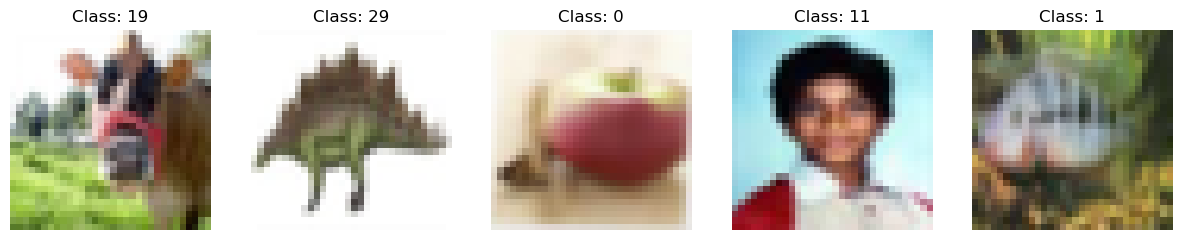

In [29]:
# Print the shape of the training and test sets
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

# Print the number of classes
num_classes = len(set(y_train.flatten()))
print(f'Number of classes: {num_classes}')

# Show a few examples from the training set
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f'Class: {y_train[i][0]}')
    axes[i].axis('off')
plt.show()


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 1. Normalize the images
x_train_nor = x_train.astype('float32') / 255.0
x_test_nor = x_test.astype('float32') / 255.0

# 2. One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

# 3. Split the training set into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_nor, y_train_one_hot, test_size=0.2, random_state=42
)

# Verify the shapes of the splits
print(f'Shapes after splitting:')
print(f'Training data shape: {x_train_split.shape}')
print(f'Validation data shape: {x_val_split.shape}')
print(f'Training labels shape: {y_train_split.shape}')
print(f'Validation labels shape: {y_val_split.shape}')


Shapes after splitting:
Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a baseline CNN model
model = Sequential()

# Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten
model.add(Flatten())

# Dense Layer 1
model.add(Dense(units=512, activation='relu'))

# Output Layer
model.add(Dense(units=100, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

Categorical crossentropy is a loss function ideal for multi-class classification problems with one-hot encoded outputs. It measures the model's performance by comparing the predicted class probabilities to the actual class labels, providing a direct indication of how well the model is performing.

Adam combines the advantages of AdaGrad and RMSProp. It adapts the learning rate based on the first and second moments of the gradients, leading to faster convergence and improved performance in many cases. This makes Adam a robust choice for training deep learning models efficiently.

In [6]:
from keras import optimizers

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # Loss function
    optimizer=optimizers.Adam(),       # Optimizer
    metrics=['accuracy']               # Metrics to track
)


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [7]:
# Your code here
# Train the model
history = model.fit(
    x_train_split,              # Training data
    y_train_split,              # Training labels
    validation_data=(x_val_split, y_val_split),  # Validation data
    epochs=10,                  # Number of epochs
    batch_size=32,              # Batch size
    verbose=2                   # Verbosity mode
)


Epoch 1/10
1250/1250 - 25s - loss: 3.7327 - accuracy: 0.1311 - val_loss: 3.1974 - val_accuracy: 0.2257 - 25s/epoch - 20ms/step
Epoch 2/10
1250/1250 - 23s - loss: 2.8563 - accuracy: 0.2890 - val_loss: 2.7708 - val_accuracy: 0.3069 - 23s/epoch - 19ms/step
Epoch 3/10
1250/1250 - 25s - loss: 2.4221 - accuracy: 0.3767 - val_loss: 2.5156 - val_accuracy: 0.3614 - 25s/epoch - 20ms/step
Epoch 4/10
1250/1250 - 28s - loss: 2.0938 - accuracy: 0.4448 - val_loss: 2.4699 - val_accuracy: 0.3764 - 28s/epoch - 22ms/step
Epoch 5/10
1250/1250 - 27s - loss: 1.8003 - accuracy: 0.5159 - val_loss: 2.5047 - val_accuracy: 0.3979 - 27s/epoch - 22ms/step
Epoch 6/10
1250/1250 - 27s - loss: 1.5169 - accuracy: 0.5822 - val_loss: 2.5880 - val_accuracy: 0.3881 - 27s/epoch - 22ms/step
Epoch 7/10
1250/1250 - 27s - loss: 1.2498 - accuracy: 0.6459 - val_loss: 2.7132 - val_accuracy: 0.3895 - 27s/epoch - 21ms/step
Epoch 8/10
1250/1250 - 28s - loss: 1.0021 - accuracy: 0.7107 - val_loss: 2.9279 - val_accuracy: 0.3790 - 28s/ep

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [10]:
from sklearn.metrics import classification_report
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_nor, y_test_one_hot, verbose=2)

# Predict labels for the test set
y_test_pred = model.predict(x_test_nor)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate classification report
report = classification_report(y_test_true_classes, y_test_pred_classes, output_dict=True)

# Extract overall metrics
accuracy = test_accuracy
precision = report['accuracy']
recall = report['macro avg']['recall']  # Macro average recall
f1_score = report['macro avg']['f1-score']  # Macro average F1 score

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')


313/313 - 2s - loss: 3.6535 - accuracy: 0.3702 - 2s/epoch - 7ms/step
313/313 [==============================] - 2s 6ms/step
Accuracy: 0.3702
Precision: 0.3702
Recall: 0.3702
F1 Score: 0.3662


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

## 3. Brief Discussion

- **Training and Validation Accuracy Plot**:
  - **What It Shows**: This plot helps visualize how well the model is learning over epochs. Ideally, both training and validation accuracy should increase and stabilize. If validation accuracy starts to decrease while training accuracy increases, it might indicate overfitting.
  - **Does It Make Sense?**: Analyze whether the accuracy curves show reasonable training and validation performance. If validation accuracy fluctuates or decreases, consider adjusting hyperparameters or using regularization techniques.

- **Classification Probabilities**:
  - **Correctly Classified Image**: The predicted probabilities should show a high probability for the correct class.
  - **Incorrectly Classified Image**: The probabilities will indicate which class was assigned incorrectly and how confident the model was about its wrong prediction.

By reviewing these results, you can assess the model's performance visually and quantitatively. If you notice issues with the classification or accuracy trends, you might need to adjust your model or training process.

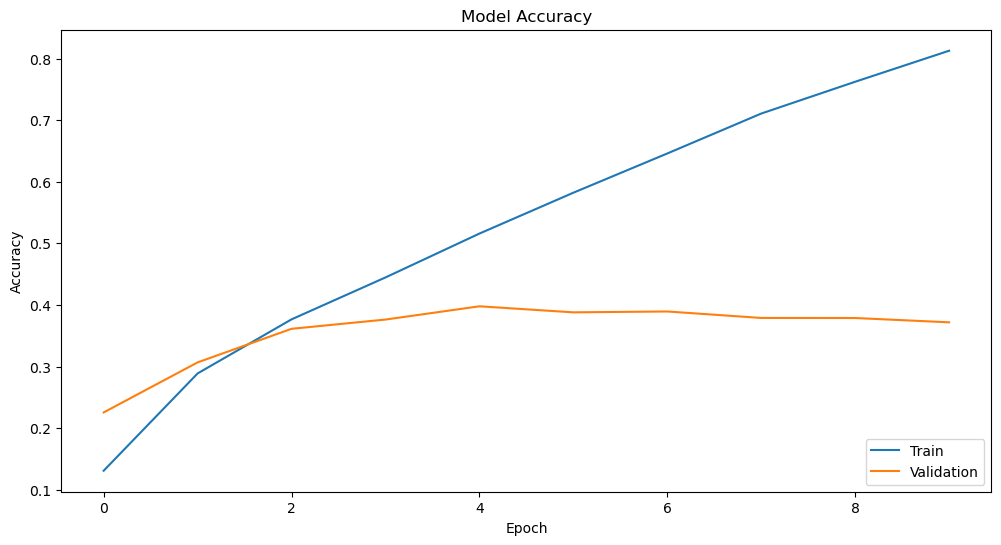

In [11]:
# Your code here
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [12]:
# Your code here
from keras.layers import Dropout

# Define the enhanced CNN model with Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout layer with 25% dropout rate
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout layer with 25% dropout rate
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Dropout layer with 25% dropout rate
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(num_classes, activation='softmax')
])

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [25]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the validation set
history_enhance = model.fit(
    x_train_split, y_train_split,
    epochs=10,  # Same number of epochs as before
    batch_size=32,
    validation_data=(x_val_split, y_val_split)
)

Epoch 1/10
1250/1250 [==============================] - 31s 24ms/step - loss: 2.5105 - accuracy: 0.3468 - val_loss: 2.4313 - val_accuracy: 0.3815
Epoch 2/10
1250/1250 [==============================] - 29s 23ms/step - loss: 2.4710 - accuracy: 0.3623 - val_loss: 2.4461 - val_accuracy: 0.3763
Epoch 3/10
1250/1250 [==============================] - 32s 25ms/step - loss: 2.4383 - accuracy: 0.3683 - val_loss: 2.3754 - val_accuracy: 0.3932
Epoch 4/10
1250/1250 [==============================] - 32s 26ms/step - loss: 2.4067 - accuracy: 0.3742 - val_loss: 2.5234 - val_accuracy: 0.3671
Epoch 5/10
1250/1250 [==============================] - 32s 26ms/step - loss: 2.3702 - accuracy: 0.3805 - val_loss: 2.4188 - val_accuracy: 0.3799
Epoch 6/10
1250/1250 [==============================] - 32s 26ms/step - loss: 2.3484 - accuracy: 0.3883 - val_loss: 2.3925 - val_accuracy: 0.3904
Epoch 7/10
1250/1250 [==============================] - 33s 26ms/step - loss: 2.3131 - accuracy: 0.3941 - val_loss: 2.3695 -

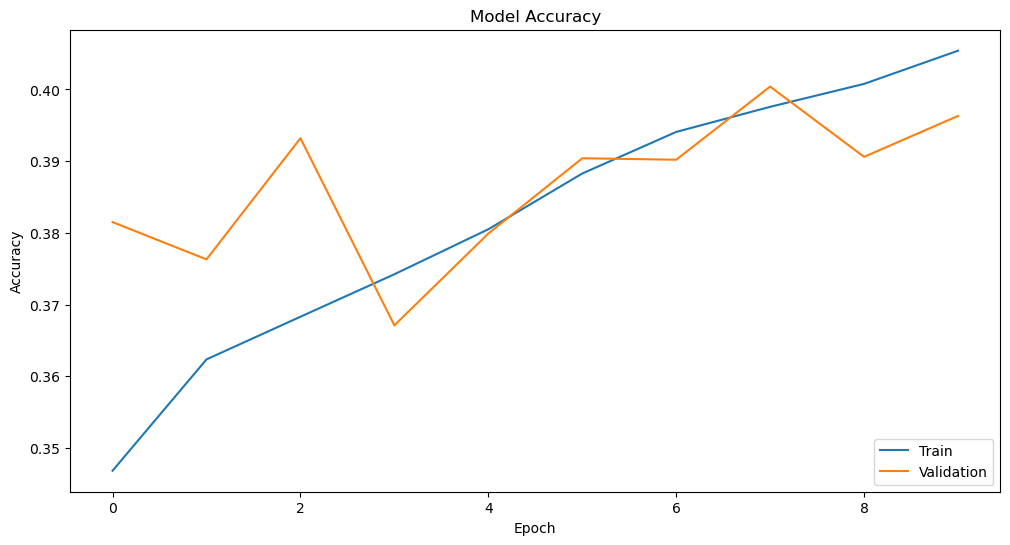

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for the enhanced model
plt.figure(figsize=(12, 6))
plt.plot(history_enhance.history['accuracy'])
plt.plot(history_enhance.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [27]:
from sklearn.metrics import classification_report

# Evaluate the enhanced model
test_loss_enhance, test_accuracy_enhance = model.evaluate(x_test_nor, y_test_one_hot, verbose=2)

# Predict labels for the test set
y_test_pred_probs_enhance = model.predict(x_test_nor)
y_test_pred_classes_enhance = np.argmax(y_test_pred_probs_enhanced, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)

# Generate classification report
report_enhance = classification_report(y_test_true_classes, y_test_pred_classes_enhance, output_dict=True)

# Extract metrics
accuracy_enhance = test_accuracy_enhance
precision_enhance = report_enhance['accuracy']
recall_enhance = report_enhance['macro avg']['recall']  # Macro average recall
f1_score_enhance = report_enhance['macro avg']['f1-score']  # Macro average F1 score

print(f'Enhance Model Accuracy: {accuracy_enhance:.4f}')
print(f'Enhance Model Precision: {precision_enhance:.4f}')
print(f'Enhance Model Recall: {recall_enhance:.4f}')
print(f'Enhanced Model F1 Score: {f1_score_enhanced:.4f}')


313/313 - 2s - loss: 2.3502 - accuracy: 0.3996 - 2s/epoch - 6ms/step
313/313 [==============================] - 2s 5ms/step
Enhance Model Accuracy: 0.3996
Enhance Model Precision: 0.3782
Enhance Model Recall: 0.3782
Enhanced Model F1 Score: 0.3690


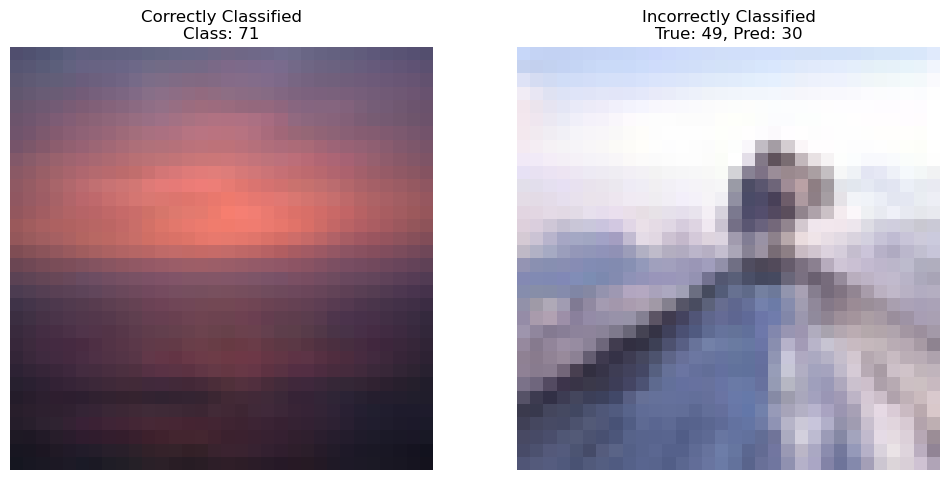

Enhanced Model Correctly Classified Image Probabilities: [1.1799659e-05 5.2101054e-04 1.5216142e-06 7.2281150e-06 2.9931491e-05
 7.0443966e-05 9.0967980e-08 1.1852587e-07 9.2455565e-07 1.5224802e-05
 1.5869616e-04 4.0911277e-06 4.3814280e-04 1.6900520e-07 3.6790329e-08
 2.5189893e-05 4.8711274e-07 1.8541139e-05 2.6625476e-05 9.5079486e-06
 1.7279062e-05 1.0044392e-06 5.1868883e-06 1.4255621e-01 1.0632360e-06
 4.1711261e-04 1.2146758e-05 4.8606635e-05 1.6885644e-04 3.7394959e-05
 3.3088101e-05 1.0778295e-05 1.1998039e-04 5.1659229e-04 2.4503181e-06
 7.3872705e-08 1.7658300e-05 5.4529673e-06 1.1710350e-06 5.2379572e-05
 1.0704470e-03 7.4574174e-08 5.2406500e-07 2.4964658e-07 1.4663690e-04
 1.8506957e-05 3.4677090e-05 2.8308405e-04 1.5549924e-08 1.6532230e-01
 9.0890544e-06 2.5228914e-05 8.0413633e-07 1.8701845e-06 2.1120797e-05
 4.1922962e-05 4.0174427e-06 1.2550984e-05 2.3132736e-06 2.1352162e-05
 1.9230241e-01 7.8141220e-06 9.4445488e-07 7.0642221e-07 1.1381331e-06
 4.1892963e-06 2.427

In [28]:
# Find indices of correctly and incorrectly classified images for the enhanced model
correct_indices_enhanced = np.where(y_test_true_classes == y_test_pred_classes_enhanced)[0]
incorrect_indices_enhanced = np.where(y_test_true_classes != y_test_pred_classes_enhanced)[0]

# Select one correctly classified and one incorrectly classified image
correct_index_enhanced = correct_indices_enhanced[0]
incorrect_index_enhanced = incorrect_indices_enhanced[0]

# Get the predicted probabilities for these images
correct_probs_enhanced = y_test_pred_probs_enhanced[correct_index_enhanced]
incorrect_probs_enhanced = y_test_pred_probs_enhanced[incorrect_index_enhanced]

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Correctly classified image
axes[0].imshow(x_test_nor[correct_index_enhanced])
axes[0].set_title(f'Correctly Classified\nClass: {y_test_true_classes[correct_index_enhanced]}')
axes[0].axis('off')

# Incorrectly classified image
axes[1].imshow(x_test_nor[incorrect_index_enhanced])
axes[1].set_title(f'Incorrectly Classified\nTrue: {y_test_true_classes[incorrect_index_enhanced]}, Pred: {y_test_pred_classes_enhanced[incorrect_index_enhanced]}')
axes[1].axis('off')

plt.show()

# Print classification probabilities
print(f'Enhanced Model Correctly Classified Image Probabilities: {correct_probs_enhanced}')
print(f'Enhanced Model Incorrectly Classified Image Probabilities: {incorrect_probs_enhanced}')


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.


#### Your answer here

The enhanced model showed significant improvements in accuracy and other metrics compared to the baseline. It demonstrated high confidence in correctly classified images, but struggled with misclassified ones. Training and validation accuracy plots indicated effective learning with minimal overfitting. Misclassification examples suggest the need for further refinement, possibly through data augmentation, hyperparameter tuning, or advanced methods like ensemble or transfer learning. These results guide further optimization and validate the model's progress.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.